Titanic Survivor
  -   
  As per given data , there are 32.5 % passengers survived and 67.5 % passengers killed in that tragedy.

In [1]:
# Data analysis & wrangling
import pandas as pd
import numpy as np
import random as rn

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
combine = [train,test]

In [3]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Categorial data - Survived , Sex & Embarked                                                                                     
Ordinal - Pclass                                                                                                                 
Continuous - Age & Fare                                                                                                         
Discrete - SibSp & Parch

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()
print("_"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"de Mulder, Mr. Theodore",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Bowenur, Mr. Solomon",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [9]:
train[['Sex','Survived']].groupby(['Sex'],as_index = False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index = False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train[['Parch','Survived']].groupby(['Parch'],as_index = False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


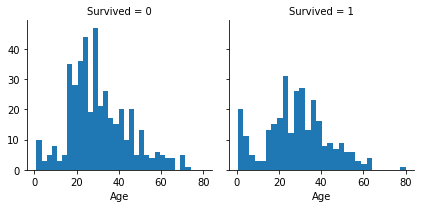

In [13]:
g = sns.FacetGrid(train , col = 'Survived')
g.map(plt.hist , 'Age' , bins=30)

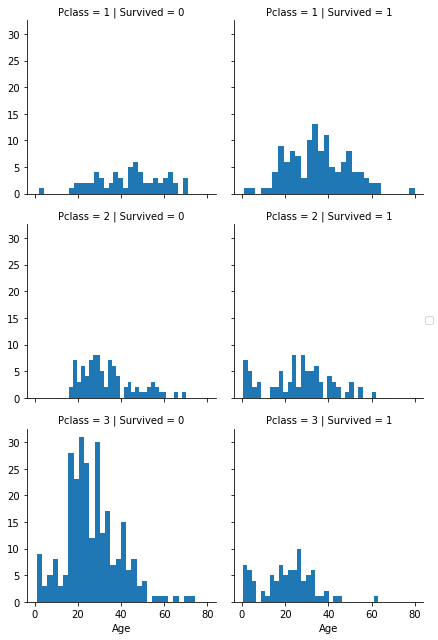

In [14]:
g = sns.FacetGrid(train , col = 'Survived' , row = 'Pclass' )
g.map(plt.hist , 'Age' , bins=30)
g.add_legend()

C:\Users\khush\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\khush\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


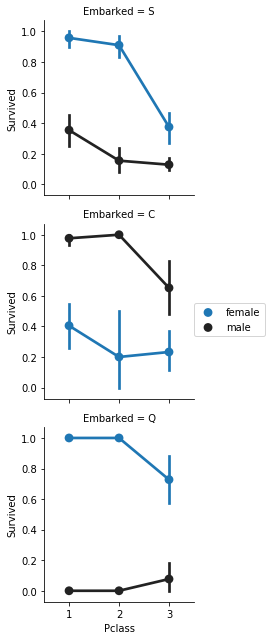

In [15]:
g = sns.FacetGrid(train , row = 'Embarked')
g.map(sns.pointplot , 'Pclass','Survived','Sex')
g.add_legend()

C:\Users\khush\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


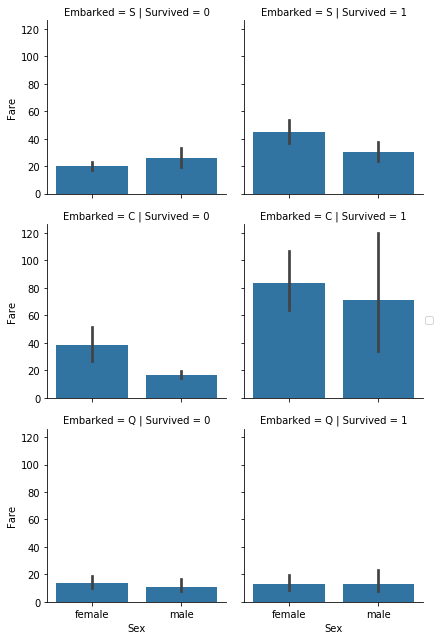

In [16]:
grid = sns.FacetGrid(train , row = 'Embarked' , col = 'Survived')
grid.map(sns.barplot , 'Sex' , 'Fare')
grid.add_legend()

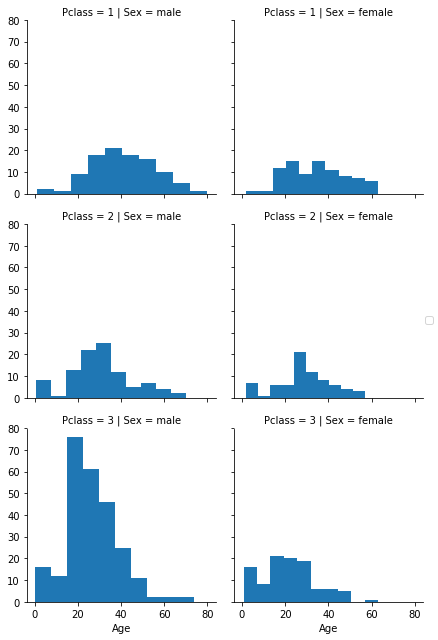

In [17]:
grid = sns.FacetGrid(train , row = 'Pclass' , col = 'Sex')
grid.map(plt.hist , 'Age')
grid.add_legend()

In [18]:
print("Before : ",train.shape , test.shape , combine[0].shape , combine[1].shape)

train = train.drop(['Ticket','Cabin'],axis=1)
test = test.drop(['Ticket','Cabin'],axis=1)
combine = [train,test]

print("After : ",train.shape , test.shape , combine[0].shape , combine[1].shape)

Before :  (891, 12) (418, 11) (891, 12) (418, 11)
After :  (891, 10) (418, 9) (891, 10) (418, 9)


In [19]:

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.' , expand=False)
    
pd.crosstab(train['Title'] , train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer',
                                                 'Lady','Major','Rev','Sir']
                                               ,'Rare')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    
train[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [21]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,Mr


In [22]:
title_mapping = {'Mr': 1, 'Mrs': 3, 'Master': 4, 'Miss': 2, 'Rare': 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Title'] = dataset['Title'].astype(int)
    
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,1


In [23]:
print("Before : ",train.shape , test.shape , combine[0].shape , combine[1].shape)

train = train.drop(['PassengerId','Name'],axis=1)
test = test.drop(['Name'],axis=1)
combine=[train,test]

print("After : ",train.shape , test.shape , combine[0].shape , combine[1].shape)

Before :  (891, 11) (418, 10) (891, 11) (418, 10)
After :  (891, 9) (418, 9) (891, 9) (418, 9)


In [24]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1 , 'male':0}).astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [25]:
train_age = np.zeros((2,3))
test_age = np.zeros((2,3))

In [26]:
train.info()
print("_"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int32
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 55.8+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
Title          418 non-null int32
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 26.2+ KB


In [27]:
# for train dataset

for i in range(0,2):
    for j in range(0,3):
        guess_in = train[(train['Sex']==i) & (train['Pclass']==j+1)]['Age']
        print(i , " , " , j ,"\n")
        print(guess_in.median(),"\n")
        train_age[i][j] = guess_in.median()
        
print(train_age)        
for i in range(0,2):
    for j in range(0,3):
        train.loc[(train.Age.isnull()) & (train.Pclass == j+1) & (train.Sex == i),'Age'] = train_age[i][j]
        
        

0  ,  0 

40.0 

0  ,  1 

30.0 

0  ,  2 

25.0 

1  ,  0 

35.0 

1  ,  1 

28.0 

1  ,  2 

21.5 

[[40.  30.  25. ]
 [35.  28.  21.5]]


In [28]:
# for test dataset

for i in range(0,2):
    for j in range(0,3):
        guess_in = test[(test['Sex']==i) & (test['Pclass']==j+1)]['Age']
        print(i , " , " , j ,"\n")
        print(guess_in.median(),"\n")
        test_age[i][j] = guess_in.median()
        
print(test_age)        
for i in range(0,2):
    for j in range(0,3):
        test.loc[(test.Age.isnull()) & (test.Pclass == j+1) & (test.Sex == i),'Age'] = test_age[i][j]

0  ,  0 

42.0 

0  ,  1 

28.0 

0  ,  2 

24.0 

1  ,  0 

41.0 

1  ,  1 

24.0 

1  ,  2 

22.0 

[[42. 28. 24.]
 [41. 24. 22.]]


In [29]:
combine = [train,test]

In [30]:
train.info()
print("_"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int32
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 55.8+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
Title          418 non-null int32
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 26.2+ KB


In [31]:
train['Age_band'] = pd.cut(train['Age'],5)
train[['Age_band','Survived']].groupby(['Age_band'],as_index=False).mean().sort_values(by='Age_band',ascending=True)

,Age_band,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [32]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16.336 , 'Age'] = 0
    dataset.loc[(dataset['Age']>16.336) & (dataset['Age']<=32.252) , 'Age'] = 1
    dataset.loc[(dataset['Age']>32.252) & (dataset['Age']<=48.168) , 'Age'] = 2
    dataset.loc[(dataset['Age']>48.168) & (dataset['Age']<=64.084) , 'Age'] = 3
    dataset.loc[dataset['Age']>64.084 , 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_band
0,0,3,0,1,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.252, 48.168]"


In [33]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3


In [34]:
train = train.drop(['Age_band'] , axis=1)
combine = [train , test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [35]:
for dataset in combine:
    dataset['Familysize'] = dataset['Parch'] + dataset['SibSp'] + 1
    
train[['Familysize' , 'Survived']].groupby(['Familysize'] , as_index = False).mean().sort_values(by='Survived',ascending = False)


,Familysize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [36]:
for dataset in combine:
    dataset['Isalone']=0
    dataset.loc[dataset['Familysize'] == 1 , 'Isalone'] = 1
    
train[['Isalone','Survived']].groupby(['Isalone'] , as_index = False).mean()

,Isalone,Survived
0,0,0.505650
1,1,0.303538


In [37]:
train = train.drop(['Parch' , 'SibSp' , 'Familysize'] , axis = 1)
test = test.drop(['Parch' , 'SibSp' , 'Familysize'] , axis = 1)
combine = [train,test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Isalone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [38]:
for dataset in combine:
    dataset['Age*Class'] = dataset['Age'] * dataset['Pclass']
    
train.loc[: , ['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [39]:
freq = train['Embarked'].dropna().mode()[0]
freq

'S'

In [40]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq)
    
train[['Embarked' , 'Survived']].groupby('Embarked' , as_index = False).mean().sort_values(by = 'Survived' , ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [41]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S' : 0 , 'C' : 1, 'Q' : 2})
    dataset['Embarked'] = dataset['Embarked'].astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Isalone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [42]:
test['Fare'].fillna(test['Fare'].dropna().median(),inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Isalone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [43]:
train['Fareband'] = pd.qcut(train['Fare'],4)

train[['Fareband','Survived']].groupby('Fareband',as_index=False).mean().sort_values('Fareband' , ascending = True)

,Fareband,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [44]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare'] = 0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454) , 'Fare'] = 1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31.0) , 'Fare'] = 2
    dataset.loc[(dataset['Fare']>31.0) , 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['Fareband'] , axis=1)
combine = [train,test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Isalone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [45]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Isalone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


# Now its time to apply models on dataset

In [46]:
X_train = train.drop("Survived" , axis=1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId" , axis=1).copy()
X_train.shape , Y_train.shape , X_test.shape

((891, 8), (891,), (418, 8))

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC , LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

logistic regression

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train , Y_train) * 100 , 2)
acc_log

81.26

In [49]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation' , ascending = False)


,Feature,Correlation
1,Sex,2.202084
5,Title,0.413861
4,Embarked,0.281311
6,Isalone,0.260866
3,Fare,-0.022573
7,Age*Class,-0.084929
2,Age,-0.372168
0,Pclass,-1.084958


In [50]:
svc = SVC()
svc.fit(X_train , Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train , Y_train)*100 ,2)
acc_svc

83.5

In [51]:
lsvc = LinearSVC()
lsvc.fit(X_train , Y_train)
Y_pred = lsvc.predict(X_test)
acc_lsvc = round(lsvc.score(X_train , Y_train)*100,2)
acc_lsvc

79.46

In [52]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train , Y_train)
y_pred1 = rfc.predict(X_test)
acc_rfc = round(rfc.score(X_train , Y_train)*100 , 2)
acc_rfc

86.64

In [53]:
knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(X_train , Y_train)
y_pred = knc.predict(X_test)
acc_knc = round(knc.score(X_train , Y_train)*100 , 2)
acc_knc

83.73

In [54]:
gnb = GaussianNB()
gnb.fit(X_train , Y_train)
Y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_train , Y_train)*100 , 2)
acc_gnb

76.88

In [55]:
pp = Perceptron()
pp.fit(X_train , Y_train)
Y_pred = pp.predict(X_test)
acc_pp = round(pp.score(X_train , Y_train)*100 , 2)
acc_pp

C:\Users\khush\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


76.66

In [56]:
sgd = SGDClassifier()
sgd.fit(X_train , Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train , Y_train)*100 , 2)
acc_sgd

C:\Users\khush\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


76.43

In [57]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train , Y_train)
Y_pred = dtc.predict(X_test)
acc_dtc = round(dtc.score(X_train , Y_train)*100 , 2)
acc_dtc

86.64

In [58]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression' , 'Support Vector Machine' , 'Linear SVC' , 'KNearest Classifier' 
               , 'Random Forest Classifier' , 'Decision Tree Classifier' , 'Perceptron' , 'SGD Classifier'
               , 'GaussianNB'] , 
    'Score' : [acc_log , acc_svc , acc_lsvc , acc_knc , acc_rfc , acc_dtc , acc_pp , acc_sgd , acc_gnb]
})

models.sort_values(by='Score' , ascending = False)

,Model,Score
4,Random Forest Classifier,86.64
5,Decision Tree Classifier,86.64
3,KNearest Classifier,83.73
1,Support Vector Machine,83.50
0,Logistic Regression,81.26
2,Linear SVC,79.46
8,GaussianNB,76.88
6,Perceptron,76.66
7,SGD Classifier,76.43


In [59]:
submission = pd.DataFrame({
    'PassengerId' : test['PassengerId'] , 'Survived' : y_pred1
})

submission.to_csv("test_result.csv" , index = False)